In [1]:
import itertools
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing, pipeline
import torch
from torch import utils
from torchvision import datasets

# Building data pipelines in PyTorch

Follow along as I live code from Chapter 12 of [*Machine Learning with PyTorch and Scikit-Learn*](https://github.com/rasbt/machine-learning-book)!

## Creating a DataLoader from existing tensors

In [2]:
utils.data.DataLoader?

In [3]:
prng = torch.manual_seed(42)
dataset = torch.rand(10, 8, generator=prng)

In [4]:
dataset

tensor([[0.8823, 0.9150, 0.3829, 0.9593, 0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936, 0.8694, 0.5677, 0.7411, 0.4294],
        [0.8854, 0.5739, 0.2666, 0.6274, 0.2696, 0.4414, 0.2969, 0.8317],
        [0.1053, 0.2695, 0.3588, 0.1994, 0.5472, 0.0062, 0.9516, 0.0753],
        [0.8860, 0.5832, 0.3376, 0.8090, 0.5779, 0.9040, 0.5547, 0.3423],
        [0.6343, 0.3644, 0.7104, 0.9464, 0.7890, 0.2814, 0.7886, 0.5895],
        [0.7539, 0.1952, 0.0050, 0.3068, 0.1165, 0.9103, 0.6440, 0.7071],
        [0.6581, 0.4913, 0.8913, 0.1447, 0.5315, 0.1587, 0.6542, 0.3278],
        [0.6532, 0.3958, 0.9147, 0.2036, 0.2018, 0.2018, 0.9497, 0.6666],
        [0.9811, 0.0874, 0.0041, 0.1088, 0.1637, 0.7025, 0.6790, 0.9155]])

In [5]:
dataloader = utils.data.DataLoader(dataset)

In [6]:
for i, batch in enumerate(dataloader):
    print(batch)

tensor([[0.8823, 0.9150, 0.3829, 0.9593, 0.3904, 0.6009, 0.2566, 0.7936]])
tensor([[0.9408, 0.1332, 0.9346, 0.5936, 0.8694, 0.5677, 0.7411, 0.4294]])
tensor([[0.8854, 0.5739, 0.2666, 0.6274, 0.2696, 0.4414, 0.2969, 0.8317]])
tensor([[0.1053, 0.2695, 0.3588, 0.1994, 0.5472, 0.0062, 0.9516, 0.0753]])
tensor([[0.8860, 0.5832, 0.3376, 0.8090, 0.5779, 0.9040, 0.5547, 0.3423]])
tensor([[0.6343, 0.3644, 0.7104, 0.9464, 0.7890, 0.2814, 0.7886, 0.5895]])
tensor([[0.7539, 0.1952, 0.0050, 0.3068, 0.1165, 0.9103, 0.6440, 0.7071]])
tensor([[0.6581, 0.4913, 0.8913, 0.1447, 0.5315, 0.1587, 0.6542, 0.3278]])
tensor([[0.6532, 0.3958, 0.9147, 0.2036, 0.2018, 0.2018, 0.9497, 0.6666]])
tensor([[0.9811, 0.0874, 0.0041, 0.1088, 0.1637, 0.7025, 0.6790, 0.9155]])


In [7]:
dataloader = utils.data.DataLoader(dataset, batch_size=3)

for i, batch in enumerate(dataloader):
    print(batch)

tensor([[0.8823, 0.9150, 0.3829, 0.9593, 0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936, 0.8694, 0.5677, 0.7411, 0.4294],
        [0.8854, 0.5739, 0.2666, 0.6274, 0.2696, 0.4414, 0.2969, 0.8317]])
tensor([[0.1053, 0.2695, 0.3588, 0.1994, 0.5472, 0.0062, 0.9516, 0.0753],
        [0.8860, 0.5832, 0.3376, 0.8090, 0.5779, 0.9040, 0.5547, 0.3423],
        [0.6343, 0.3644, 0.7104, 0.9464, 0.7890, 0.2814, 0.7886, 0.5895]])
tensor([[0.7539, 0.1952, 0.0050, 0.3068, 0.1165, 0.9103, 0.6440, 0.7071],
        [0.6581, 0.4913, 0.8913, 0.1447, 0.5315, 0.1587, 0.6542, 0.3278],
        [0.6532, 0.3958, 0.9147, 0.2036, 0.2018, 0.2018, 0.9497, 0.6666]])
tensor([[0.9811, 0.0874, 0.0041, 0.1088, 0.1637, 0.7025, 0.6790, 0.9155]])


In [8]:
dataloader = utils.data.DataLoader(dataset, batch_size=3, drop_last=True)

for i, batch in enumerate(dataloader):
    print(batch)

tensor([[0.8823, 0.9150, 0.3829, 0.9593, 0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936, 0.8694, 0.5677, 0.7411, 0.4294],
        [0.8854, 0.5739, 0.2666, 0.6274, 0.2696, 0.4414, 0.2969, 0.8317]])
tensor([[0.1053, 0.2695, 0.3588, 0.1994, 0.5472, 0.0062, 0.9516, 0.0753],
        [0.8860, 0.5832, 0.3376, 0.8090, 0.5779, 0.9040, 0.5547, 0.3423],
        [0.6343, 0.3644, 0.7104, 0.9464, 0.7890, 0.2814, 0.7886, 0.5895]])
tensor([[0.7539, 0.1952, 0.0050, 0.3068, 0.1165, 0.9103, 0.6440, 0.7071],
        [0.6581, 0.4913, 0.8913, 0.1447, 0.5315, 0.1587, 0.6542, 0.3278],
        [0.6532, 0.3958, 0.9147, 0.2036, 0.2018, 0.2018, 0.9497, 0.6666]])


## Combining two tensors into a joint dataset

In [9]:
class CustomDataset(utils.data.Dataset):

    def __init__(self, d1, d2):
        self. _d1 = d1
        self._d2 = d2

    def __len__(self):
        return len(self._d1)

    def __getitem__(self, idx):
        return self._d1[idx], self._d2[idx]



In [10]:
features = torch.rand(10, 8, generator=prng)
target = torch.rand(10, 1, generator=prng)

In [11]:
dataset = CustomDataset(features, target)

In [12]:
dataloader = utils.data.DataLoader(dataset, batch_size=3)

for i, (feature_batch, target_batch) in enumerate(dataloader):
    print(feature_batch, target_batch)

tensor([[0.7860, 0.1115, 0.2477, 0.6524, 0.6057, 0.3725, 0.7980, 0.8399],
        [0.1374, 0.2331, 0.9578, 0.3313, 0.3227, 0.0162, 0.2137, 0.6249],
        [0.4340, 0.1371, 0.5117, 0.1585, 0.0758, 0.2247, 0.0624, 0.1816]]) tensor([[0.2709],
        [0.9295],
        [0.6115]])
tensor([[0.9998, 0.5944, 0.6541, 0.0337, 0.1716, 0.3336, 0.5782, 0.0600],
        [0.2846, 0.2007, 0.5014, 0.3139, 0.4654, 0.1612, 0.1568, 0.2083],
        [0.3289, 0.1054, 0.9192, 0.4008, 0.9302, 0.6558, 0.0766, 0.8460]]) tensor([[0.2234],
        [0.2469],
        [0.4761]])
tensor([[0.3624, 0.3083, 0.0850, 0.0029, 0.6431, 0.3908, 0.6947, 0.0897],
        [0.8712, 0.1330, 0.4137, 0.6044, 0.7581, 0.9037, 0.9555, 0.1035],
        [0.6258, 0.2849, 0.4452, 0.1258, 0.9554, 0.1330, 0.7672, 0.6757]]) tensor([[0.7792],
        [0.3722],
        [0.2147]])
tensor([[0.6625, 0.2297, 0.9545, 0.6099, 0.5643, 0.0594, 0.7099, 0.4250]]) tensor([[0.3288]])


In [ ]:
utils.data.TensorDataset?

In [13]:
dataset = utils.data.TensorDataset(features, target)
dataloader = utils.data.DataLoader(dataset, batch_size=3)

for i, (feature_batch, target_batch) in enumerate(dataloader):
    print(feature_batch, target_batch)

tensor([[0.7860, 0.1115, 0.2477, 0.6524, 0.6057, 0.3725, 0.7980, 0.8399],
        [0.1374, 0.2331, 0.9578, 0.3313, 0.3227, 0.0162, 0.2137, 0.6249],
        [0.4340, 0.1371, 0.5117, 0.1585, 0.0758, 0.2247, 0.0624, 0.1816]]) tensor([[0.2709],
        [0.9295],
        [0.6115]])
tensor([[0.9998, 0.5944, 0.6541, 0.0337, 0.1716, 0.3336, 0.5782, 0.0600],
        [0.2846, 0.2007, 0.5014, 0.3139, 0.4654, 0.1612, 0.1568, 0.2083],
        [0.3289, 0.1054, 0.9192, 0.4008, 0.9302, 0.6558, 0.0766, 0.8460]]) tensor([[0.2234],
        [0.2469],
        [0.4761]])
tensor([[0.3624, 0.3083, 0.0850, 0.0029, 0.6431, 0.3908, 0.6947, 0.0897],
        [0.8712, 0.1330, 0.4137, 0.6044, 0.7581, 0.9037, 0.9555, 0.1035],
        [0.6258, 0.2849, 0.4452, 0.1258, 0.9554, 0.1330, 0.7672, 0.6757]]) tensor([[0.7792],
        [0.3722],
        [0.2147]])
tensor([[0.6625, 0.2297, 0.9545, 0.6099, 0.5643, 0.0594, 0.7099, 0.4250]]) tensor([[0.3288]])


## Shuffle, batch, repeat

In [14]:
dataset = utils.data.TensorDataset(features, target)
dataloader = utils.data.DataLoader(dataset, batch_size=3, shuffle=True)


In [17]:
for i, (feature_batch, target_batch) in enumerate(dataloader):
    print(feature_batch, target_batch)

tensor([[0.3624, 0.3083, 0.0850, 0.0029, 0.6431, 0.3908, 0.6947, 0.0897],
        [0.6625, 0.2297, 0.9545, 0.6099, 0.5643, 0.0594, 0.7099, 0.4250],
        [0.9998, 0.5944, 0.6541, 0.0337, 0.1716, 0.3336, 0.5782, 0.0600]]) tensor([[0.7792],
        [0.3288],
        [0.2234]])
tensor([[0.8712, 0.1330, 0.4137, 0.6044, 0.7581, 0.9037, 0.9555, 0.1035],
        [0.3289, 0.1054, 0.9192, 0.4008, 0.9302, 0.6558, 0.0766, 0.8460],
        [0.6258, 0.2849, 0.4452, 0.1258, 0.9554, 0.1330, 0.7672, 0.6757]]) tensor([[0.3722],
        [0.4761],
        [0.2147]])
tensor([[0.2846, 0.2007, 0.5014, 0.3139, 0.4654, 0.1612, 0.1568, 0.2083],
        [0.7860, 0.1115, 0.2477, 0.6524, 0.6057, 0.3725, 0.7980, 0.8399],
        [0.1374, 0.2331, 0.9578, 0.3313, 0.3227, 0.0162, 0.2137, 0.6249]]) tensor([[0.2469],
        [0.2709],
        [0.9295]])
tensor([[0.4340, 0.1371, 0.5117, 0.1585, 0.0758, 0.2247, 0.0624, 0.1816]]) tensor([[0.6115]])


In [18]:
epochs = 2
for epoch in range(epochs):
    for i, (X, y) in enumerate(dataloader):
        print(f"Epoch {epoch}: features: {X}, target: {y}")

Epoch 0: features: tensor([[0.9998, 0.5944, 0.6541, 0.0337, 0.1716, 0.3336, 0.5782, 0.0600],
        [0.4340, 0.1371, 0.5117, 0.1585, 0.0758, 0.2247, 0.0624, 0.1816],
        [0.6625, 0.2297, 0.9545, 0.6099, 0.5643, 0.0594, 0.7099, 0.4250]]), target: tensor([[0.2234],
        [0.6115],
        [0.3288]])
Epoch 0: features: tensor([[0.3289, 0.1054, 0.9192, 0.4008, 0.9302, 0.6558, 0.0766, 0.8460],
        [0.3624, 0.3083, 0.0850, 0.0029, 0.6431, 0.3908, 0.6947, 0.0897],
        [0.7860, 0.1115, 0.2477, 0.6524, 0.6057, 0.3725, 0.7980, 0.8399]]), target: tensor([[0.4761],
        [0.7792],
        [0.2709]])
Epoch 0: features: tensor([[0.8712, 0.1330, 0.4137, 0.6044, 0.7581, 0.9037, 0.9555, 0.1035],
        [0.1374, 0.2331, 0.9578, 0.3313, 0.3227, 0.0162, 0.2137, 0.6249],
        [0.6258, 0.2849, 0.4452, 0.1258, 0.9554, 0.1330, 0.7672, 0.6757]]), target: tensor([[0.3722],
        [0.9295],
        [0.2147]])
Epoch 0: features: tensor([[0.2846, 0.2007, 0.5014, 0.3139, 0.4654, 0.1612, 0.1568

## Creating a dataset from files on your local disk

In [19]:
%%bash

ls -l ./sample_data

total 55504
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Nov 20 14:42 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Nov 20 14:42 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Nov 20 14:42 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Nov 20 14:42 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md


In [21]:
DATA_DIR = pathlib.Path("./sample_data")

In [22]:
california_housing_train_df = pd.read_csv(DATA_DIR / "california_housing_train.csv")
california_housing_test_df = pd.read_csv(DATA_DIR / "california_housing_test.csv")


In [23]:
california_housing_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [24]:
california_housing_train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [25]:
california_housing_train_features_df = california_housing_train_df.drop("median_house_value", axis=1)
california_housing_train_target_df = california_housing_train_df.loc[:, ["median_house_value"]]

california_housing_test_features_df = california_housing_test_df.drop("median_house_value", axis=1)
california_housing_test_target_df = california_housing_test_df.loc[:, ["median_house_value"]]

In [42]:
california_housing_train_features_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [33]:
feature_preprocessing_pipeline = pipeline.make_pipeline(
    preprocessing.StandardScaler(),
    preprocessing.FunctionTransformer(lambda X: X.astype(np.float32)),
    preprocessing.FunctionTransformer(lambda X: torch.from_numpy(X))
)

target_preprocessing_pipeline = pipeline.make_pipeline(
    preprocessing.FunctionTransformer(lambda df: df.to_numpy()),
    preprocessing.FunctionTransformer(lambda X: X.astype(np.float32)),
    preprocessing.FunctionTransformer(lambda X: torch.from_numpy(X))
)

In [35]:
_features_tensor = feature_preprocessing_pipeline.fit_transform(california_housing_train_features_df)
_target_tensor = target_preprocessing_pipeline.fit_transform(california_housing_train_target_df)
california_housing_train_dataset = utils.data.TensorDataset(_features_tensor, _target_tensor)

_features_tensor = feature_preprocessing_pipeline.transform(california_housing_test_features_df)
_target_tensor = target_preprocessing_pipeline.transform(california_housing_test_target_df)
california_housing_test_dataset = utils.data.TensorDataset(_features_tensor, _target_tensor)


In [36]:
california_housing_train_dataloader = utils.data.DataLoader(
    california_housing_train_dataset,
    batch_size=64,
    shuffle=True
)

for i, (X, y) in enumerate(california_housing_train_dataloader):
    print(X, y)

Streaming output truncated to the last 5000 lines.
         -5.0319e-01, -5.1032e-01,  1.1370e+00],
        [ 6.5438e-01, -7.3235e-01, -1.3180e+00,  6.2725e-01,  2.1319e+00,
          2.1208e-01,  1.5260e+00,  7.4657e-01],
        [-1.3206e+00,  1.0269e+00,  1.8600e+00, -1.2325e-01, -4.8972e-01,
         -5.3717e-01, -3.9329e-01,  1.6620e+00],
        [ 1.2179e+00, -1.3453e+00, -1.2386e+00,  6.9424e-02,  5.5420e-01,
          3.8284e-01,  4.9096e-01, -8.9454e-01],
        [ 9.5362e-01, -7.1363e-01, -7.6187e-01, -4.3840e-01, -4.1380e-01,
         -7.0357e-01, -4.6611e-01, -1.4862e-01],
        [ 7.9403e-01, -8.8675e-01, -7.6187e-01,  6.9285e-01,  4.8849e-02,
          6.1022e-01,  2.2829e-01,  1.7824e+00],
        [-9.8694e-02,  5.6370e-01, -5.2352e-01,  7.3094e-02, -2.4060e-01,
         -1.7039e-01, -1.1501e-01,  3.3244e-01],
        [ 1.1930e+00, -1.4014e+00, -2.0572e-01, -4.7097e-01, -6.1784e-01,
          1.1460e+00, -6.5336e-01, -1.8232e-01],
        [ 1.1930e+00, -1.3125e+00, -3.6

## Fetching available datasets from TorchVision

### CelebA

In [ ]:
datasets.CelebA?

In [37]:
celeba_dataset = datasets.CelebA(
    DATA_DIR,
    split="train",
    target_type="attr",
    download=True,
)

RuntimeError: ignored

In [ ]:
assert isinstance(celeba_dataset, torch.utils.data.Dataset)

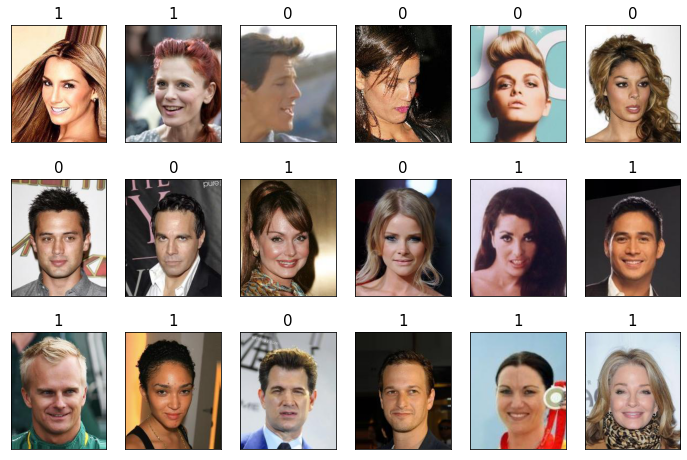

In [ ]:
fig = plt.figure(figsize=(12, 8))

for i, (image, attributes) in itertools.islice(enumerate(celeba_dataset), 18):
    ax = fig.add_subplot(3, 6, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(f'{attributes[31]}', size=15)

plt.show()

### MNIST

In [ ]:
datasets.MNIST?

In [38]:
mnist_dataset = datasets.MNIST(
    DATA_DIR,
    train=True,
    download=True
)

100%|██████████| 9912422/9912422 [00:00<00:00, 101733442.74it/s]


Extracting sample_data/MNIST/raw/train-images-idx3-ubyte.gz to sample_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 72623317.64it/s]


Extracting sample_data/MNIST/raw/train-labels-idx1-ubyte.gz to sample_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26923807.06it/s]


Extracting sample_data/MNIST/raw/t10k-images-idx3-ubyte.gz to sample_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15203933.57it/s]


Extracting sample_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to sample_data/MNIST/raw



In [39]:
assert isinstance(mnist_dataset, torch.utils.data.Dataset)

In [40]:
example = next(iter(mnist_dataset))
print(example)

(<PIL.Image.Image image mode=L size=28x28 at 0x79CF89CBE9B0>, 5)


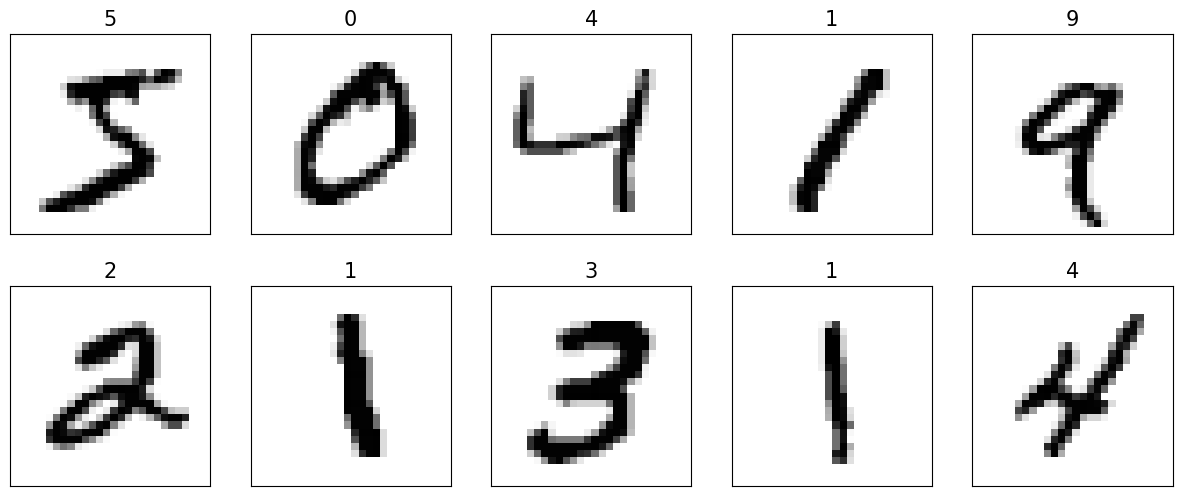

In [41]:
fig = plt.figure(figsize=(15, 6))

for i, (image, label) in itertools.islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)

plt.show()